In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math

In [4]:
a=1
n=3000
b=100
x = a*np.random.normal(size=n)+b

In [5]:
print(np.mean(x))
print(np.var(x))
print(np.std(x))

99.9942437531281
1.00330500672347
1.001651140229706


In [6]:
def make_segments(X, N, NN=0):
    #Function to split a sequence of numbers (x) into
# N equal segments, with a spacing between them NN (>=0)
#Then the mean and variances of each segment are reported
# Inputs  x : time series data
#              N : length of segment the series x to be split into
#              NN : [Optional, default=0], space between the segments in
#              data points
#
#   Output:  Xm   : Sequence of means of each segment
#           Xvar : Sequence of variance values for for each segment

    M = len(X)
    n = int(np.floor(M / (N + NN)))
    y = np.zeros((N, n))
    for i in range(n):
        j = np.arange(N) + (N + NN) * i
        y[:, i] = X[j]
    Xm = np.mean(y)
    Xvar = np.var(y)
    Xstd = np.std(y)
    return Xm, Xvar,Xstd,y

In [7]:
Xm, Xvar,Xstd,y=make_segments(x,2)
print(Xm, Xvar,Xstd)

99.99424375312812 1.00330500672347 1.001651140229706


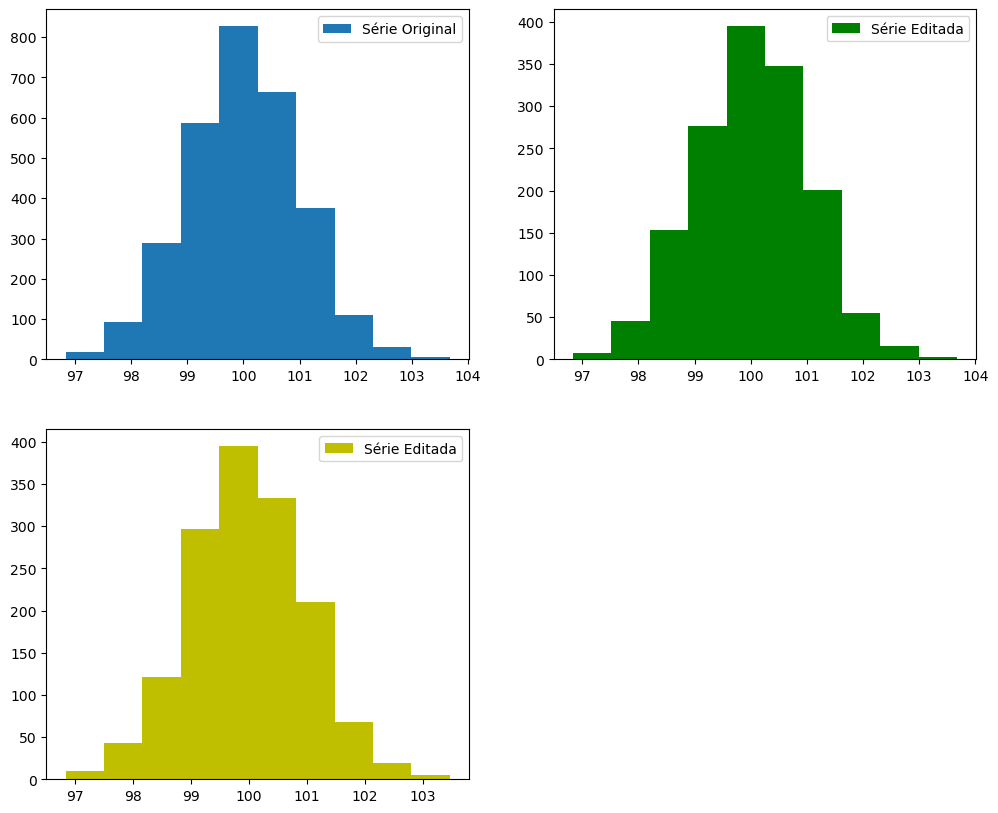

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
plt.subplot(223)

plt.hist(y[1,:],label='Série Editada',color='y')
plt.legend()


99.9942437531281 1.00330500672347 1.001651140229706


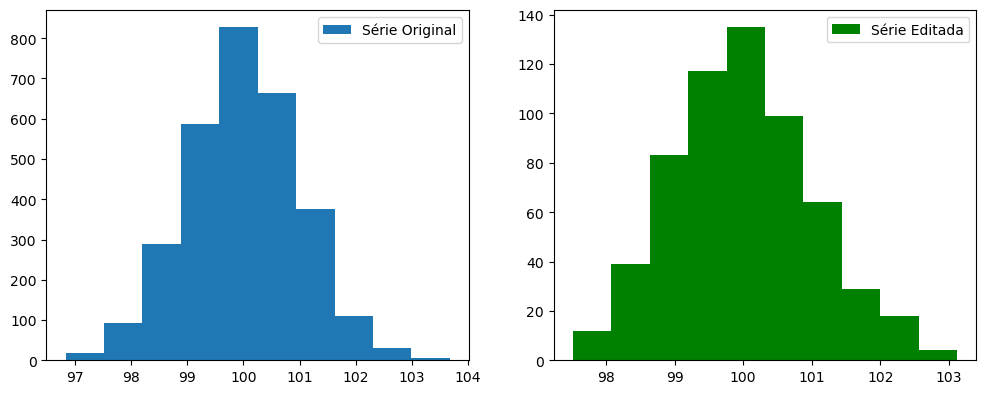

In [9]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


99.9942437531281 1.00330500672347 1.001651140229706


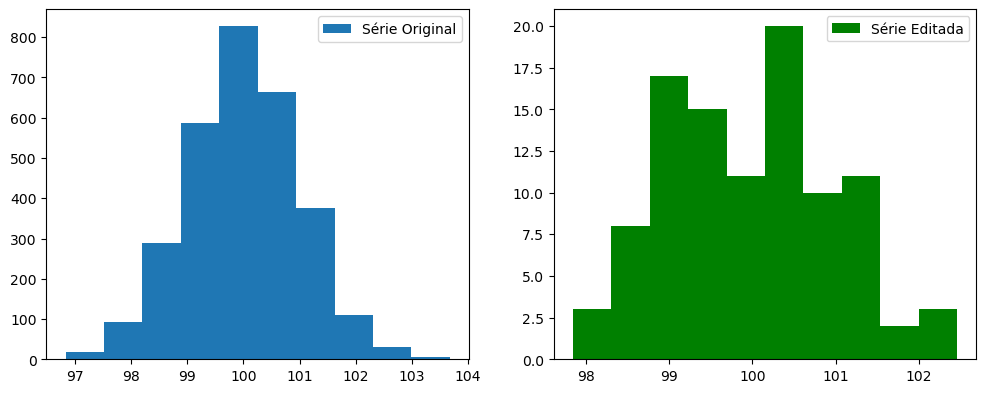

In [10]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.49889472568596 0.08056480641672668 0.2838394025091067


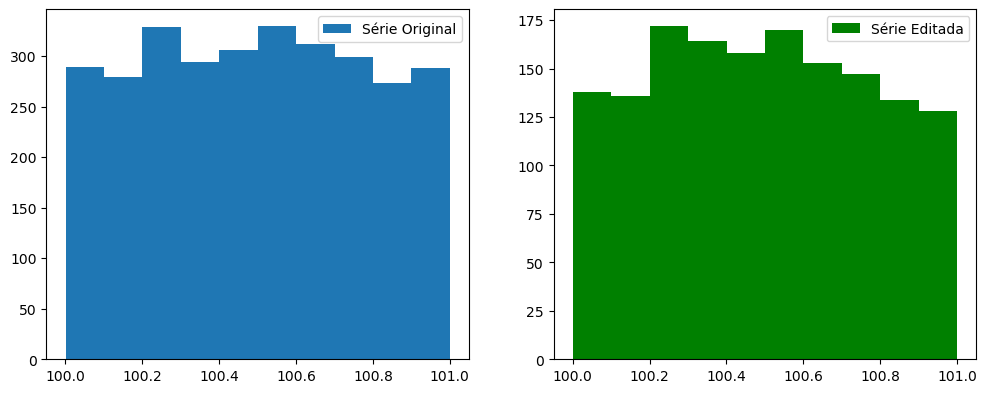

In [11]:
a=1
n=3000
b=100
x = a*np.random.sample(size=n)+b

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


100.49889472568596 0.08056480641672668 0.2838394025091067


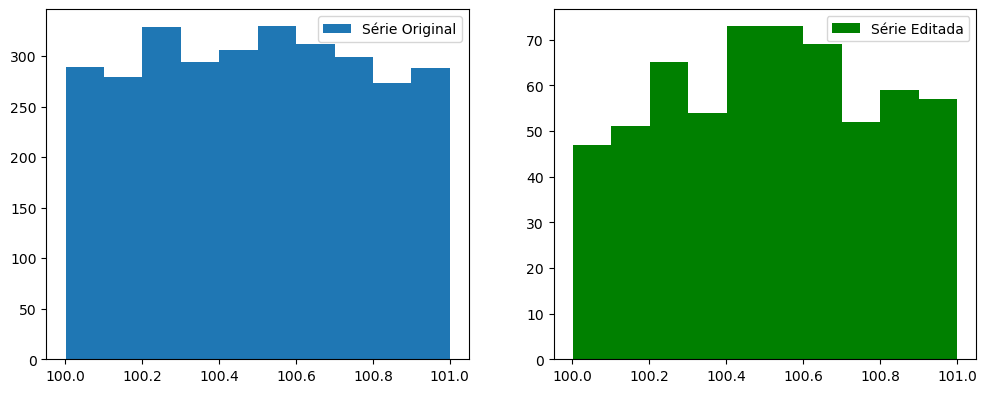

In [12]:

Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

100.49889472568596 0.08056480641672668 0.2838394025091067


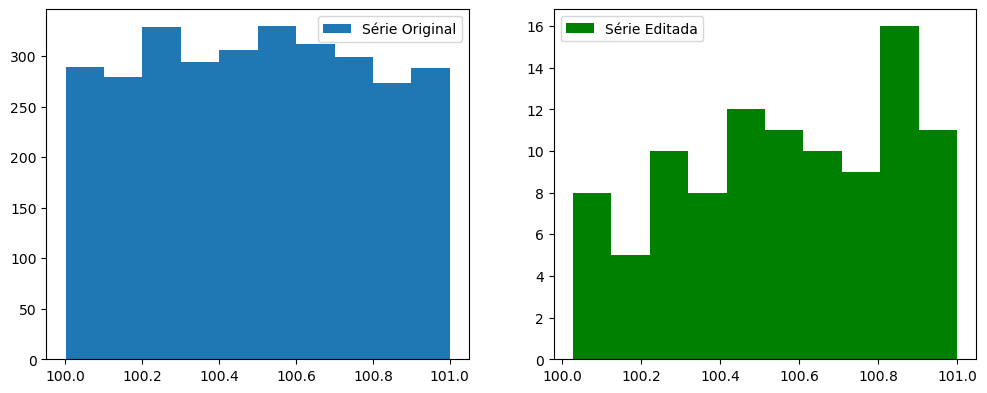

In [13]:

Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

0.3165793014502432 0.0658648890737045 0.25664155757340723


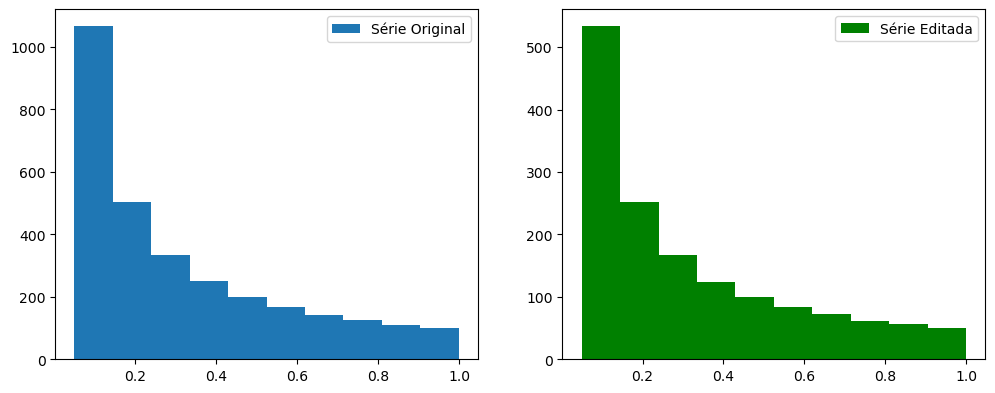

In [14]:
a=1
n=3000
b=100
x = np.exp(-np.arange(1, n+1)/1000)

Xm, Xvar,Xstd,y=make_segments(x,2)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


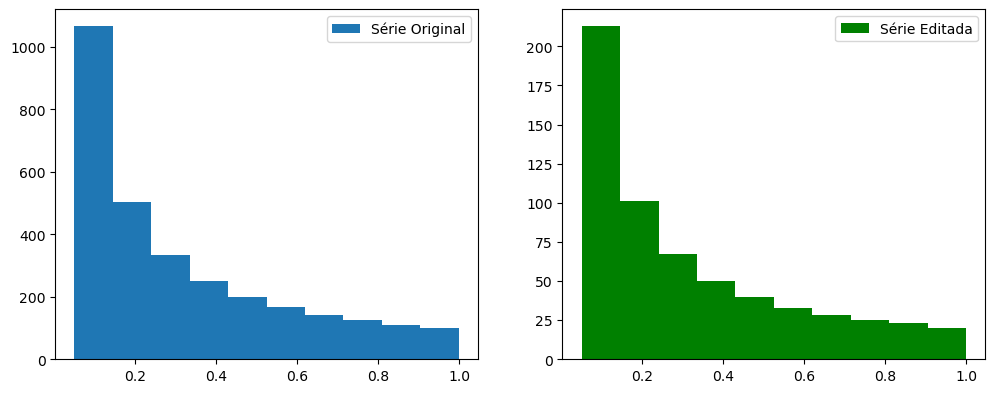

In [15]:
Xm, Xvar,Xstd,y=make_segments(x,5)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


0.3165793014502432 0.06586488907370448 0.2566415575734072


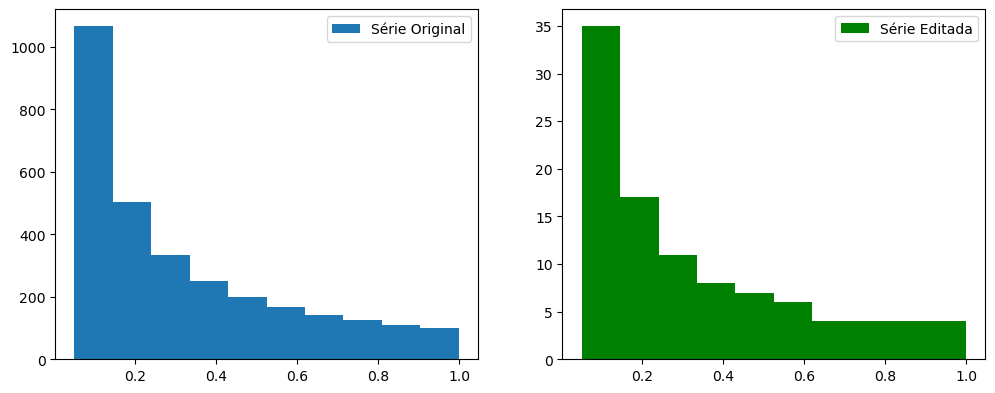

In [16]:
Xm, Xvar,Xstd,y=make_segments(x,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(x, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='Série Editada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)


In [17]:
def wildedit(X,const=3):
    Sp = pd.Series(X)
    desvio_padrao = Sp.std()
    jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
    meio = [sorted(janela)[2] for janela in jan5]
    jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
    meio2 = [sorted(janela)[1] for janela in jan3]
    meio2 =np.array(meio2 )
    Diferen = np.abs(Sp.values - meio2)
    III = np.where(Diferen > 3*desvio_padrao)[0]
    X = meio2.copy()
    X[III] = Sp[III]
    return(X)

In [19]:
dados = sc.loadmat('SST.mat')
sst = dados['sst']
ssti = sst[0,0:2000]
plt.style.use('ggplot')
time= np.linspace(start=0,stop=len(ssti),num=len(ssti))
ssti = pd.Series(ssti).interpolate().values

In [20]:
Sp= pd.Series(ssti)
desvio_padrao = Sp.std()
jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
meio = [sorted(janela)[2] for janela in jan5]
jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
meio2 = [sorted(janela)[1] for janela in jan3]
meio2 =np.array(meio2)

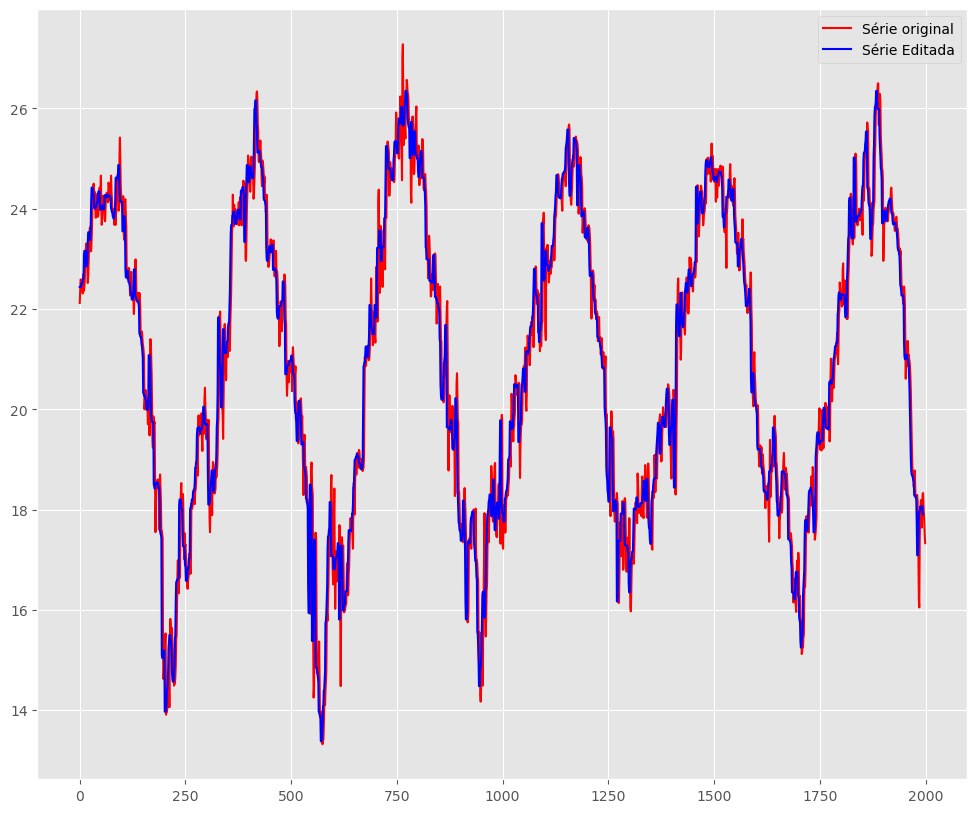

In [23]:
plt.figure(figsize=(12,10))
plt.plot(ssti,'r-' ,label='Série original')
plt.plot(meio2,'b-' ,label='Série Editada')

plt.legend()


20.965641414141416 8.982387416870727 2.9970631319461267


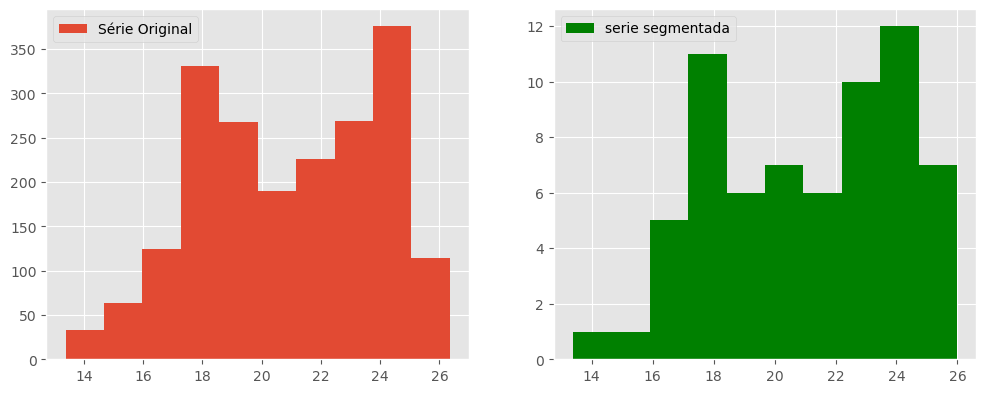

In [25]:

Xm, Xvar,Xstd,y=make_segments(meio2,30)
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(meio2, label='Série Original')
plt.legend()


plt.subplot(222)

plt.hist(y[0,:],label='serie segmentada',color='g')
plt.legend()
print(Xm, Xvar,Xstd)

In [29]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [30]:
kpss_test(meio2)

Results of KPSS Test:
Test Statistic            0.09051
p-value                   0.10000
Lags Used                27.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/home/aluno001/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
